In [19]:
from reframed import load_cbmodel
from reframed import Community
from reframed import Environment
from reframed import FBA
from reframed import plot_flux_envelope

import matplotlib.pyplot as plt

In [4]:
#load models

CAL2 = load_cbmodel('../GEMs/CAL2.xml')
SAL9 = load_cbmodel('../GEMs/SAL9.xml')
MAM2 = load_cbmodel('../GEMs/MAM2.xml')

In [5]:
#create community object

com = Community('RA_community', [CAL2, SAL9, MAM2])

In [6]:
#get a minimal media composition from the ecoli core model

e_coli_core = load_cbmodel('../GEMs/e_coli_core.xml')

M9 = Environment.from_model(e_coli_core)

print(f"Environment compounds: {', '.join(M9.get_compounds())}")

Environment compounds: co2, glc__D, h, h2o, nh4, o2, pi


In [11]:
extended_env = Environment.from_model(CAL2)

Environment compounds: pi, co2, fe3, h, mn2, fe2, glc__D, zn2, mg2, ca2, ni2, cu2, sel, cobalt2, h2o, mobd, so4, nh4, k, na1, cl, o2, tungs, slnt


In [13]:
com_merged = com.merge_models()

In [18]:
Environment.from_model(MAM2)

R_EX_pi_e	-inf	inf
R_EX_co2_e	-inf	inf
R_EX_met__L_e	0.0	inf
R_EX_metsox_S__L_e	0.0	inf
R_EX_acgam_e	0.0	inf
R_EX_cellb_e	0.0	inf
R_EX_crn_e	0.0	inf
R_EX_hxan_e	0.0	inf
R_EX_ile__L_e	0.0	inf
R_EX_chol_e	0.0	inf
R_EX_fe3_e	-inf	inf
R_EX_lac__L_e	0.0	inf
R_EX_leu__L_e	0.0	inf
R_EX_glcn_e	0.0	inf
R_EX_no3_e	0.0	inf
R_EX_h_e	-inf	inf
R_EX_orn_e	0.0	inf
R_EX_gln__L_e	0.0	inf
R_EX_pro__L_e	0.0	inf
R_EX_glyc_e	0.0	inf
R_EX_man_e	0.0	inf
R_EX_ade_e	0.0	inf
R_EX_mn2_e	-inf	inf
R_EX_4abut_e	0.0	inf
R_EX_ac_e	0.0	inf
R_EX_akg_e	0.0	inf
R_EX_ala__L_e	0.0	inf
R_EX_arg__L_e	0.0	inf
R_EX_asp__L_e	0.0	inf
R_EX_pyr_e	0.0	inf
R_EX_succ_e	0.0	inf
R_EX_thymd_e	0.0	inf
R_EX_rib__D_e	0.0	inf
R_EX_tyr__L_e	0.0	inf
R_EX_cytd_e	0.0	inf
R_EX_dcyt_e	0.0	inf
R_EX_fum_e	0.0	inf
R_EX_sbt__D_e	0.0	inf
R_EX_glu__L_e	0.0	inf
R_EX_gua_e	0.0	inf
R_EX_btn_e	0.0	inf
R_EX_ptrc_e	0.0	inf
R_EX_spmd_e	0.0	inf
R_EX_thym_e	0.0	inf
R_EX_xtsn_e	0.0	inf
R_EX_fe2_e	-inf	inf
R_EX_glc__D_e	-10.0	inf
R_EX_alltn_e	0.0	inf
R_EX_ura_e	0.

In [28]:
MAM2.reactions.R_EX_rosma_e.reaction_type

<ReactionType.EXCHANGE: 'exchange'>

In [12]:
super_oganism = com.merged_model

solution = FBA(super_oganism, constraints=extended_env)

print(solution)
solution.show_values(pattern='R_EX')

Objective: 0.0
Status: Optimal

R_EX_pyr_e    3.2975
R_EX_dha_e    3.04889
R_EX_h_e      31.9031
R_EX_glc__D_e -3.81111
R_EX_hxa_e    3.2975
R_EX_h2o_e   -12.1181
R_EX_for_e    9.8925
R_EX_34dhcinm_e  15.4156
R_EX_arab__D_e -5.17
R_EX_saa_e    15.4156
R_EX_rosma_e -15.4156


/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_amob_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_5drib_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_oxam_c
  warn(f"Constrained variable not previously declared: {r_id}")
/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/reframed/solvers/cplex_solver.py:409: UserWarning: Constrained variable not previously declared: R_DM_aacald_c
  warn(f"Constrained variable not previously declared: {r_id}")
/

In [10]:
FBA(e_coli_core)

Objective: 0.8739215069684303
Status: Optimal

In [21]:
super_oganism.biomass_reaction

'community_growth'

/Users/andreastallvik/Projects/BIOTBT3900/venv/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


CplexSolverError: CPLEX Error  1225: Numeric entry is not a double precision number (NaN).

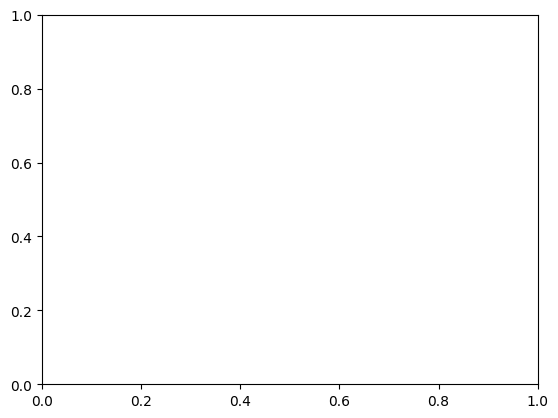

In [22]:
plot_flux_envelope(super_oganism, super_oganism.biomass_reaction, 'R_EX_rosma_e')